In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Données fournies
data = [
    ('Abidjan', 'Cocody', 'Riviera', 5, 4, 3, 250, 130000000, 'Grande villa avec piscine et garage', 'Villa', 'En vente', '5.3581, -3.9983', 1, 40, 220),
    ('San-Pédro', 'Bardot', 'Zone Portuaire', 3, 2, 1, 150, 85000000, 'Maison moderne près du port', 'Maison', 'Vendu', '4.7511, -6.6364', 2, 25, 150),
    ('Bouaké', 'Nimbo', 'Quartier Résidentiel', 4, 3, 2, 180, 90000000, 'Maison avec jardin et garage', 'Maison', 'En vente', '7.6903, -5.0327', 3, 30, 180),
    ('Yamoussoukro', 'Morofé', 'Quartier des Ambassades', 5, 4, 3, 300, 140000000, 'Villa de prestige avec piscine', 'Villa', 'Vendu', '6.8218, -5.2769', 4, 50, 240),
    ('Daloa', 'Brébo', 'Quartier Administratif', 3, 2, 1, 130, 80000000, 'Appartement spacieux avec balcon', 'Appartement', 'En vente', '6.8792, -6.4531', 5, 20, 130),
    ('Man', 'Abattoir', 'Quartier Militaire', 4, 3, 2, 200, 95000000, 'Maison familiale avec grande cour', 'Maison', 'Vendu', '7.4165, -7.5563', 6, 35, 160),
    ('Gagnoa', 'Gagnoa', 'Quartier Commercial', 2, 1, 1, 100, 70000000, 'Petit appartement moderne', 'Appartement', 'En vente', '6.1328, -5.9512', 7, 15, 90),
    ('Korhogo', 'Péléforo', 'Quartier Central', 3, 2, 2, 160, 85000000, 'Maison avec terrasse et jardin', 'Maison', 'Vendu', '9.4583, -5.6295', 1, 28, 150),
    ('Abengourou', 'Indénié', 'Quartier Administratif', 3, 2, 1, 140, 75000000, 'Appartement rénové', 'Appartement', 'En vente', '6.7320, -3.4918', 2, 18, 100),
    ('Aboisso', 'Bia Sud', 'Quartier Administratif', 5, 4, 3, 240, 120000000, 'Grande villa avec piscine', 'Villa', 'Vendu', '5.4730, -3.2065', 3, 38, 200),
    ('Divo', 'Gogobro', 'Quartier Résidentiel', 2, 1, 1, 90, 60000000, 'Maison près du marché', 'Maison', 'En vente', '5.8380, -5.3582', 4, 13, 80),
    ('Abidjan', 'Plateau', 'Centre-ville', 4, 3, 2, 180, 100000000, 'Appartement de luxe avec vue', 'Appartement', 'Vendu', '5.3043, -4.0027', 5, 30, 190)
]

# Conversion en DataFrame
columns = ['Ville', 'Commune', 'Quartier', 'Nombre_de_pieces', 'Nombre_de_chambres', 'Nombre_de_salles_de_bain', 'metre_carre', 'Prix_unitaire', 'Descriptions', 'Type_de_maison', 'Statut_maison', 'GPS', 'Idproprietaire', 'Likes', 'Nombre_de_vue']
df = pd.DataFrame(data, columns=columns)

# Prétraitement des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Nombre_de_pieces', 'Nombre_de_chambres', 'metre_carre', 'Prix_unitaire', 'Likes', 'Nombre_de_vue']),
        ('cat', OneHotEncoder(), ['Ville', 'Commune', 'Quartier', 'Type_de_maison', 'Statut_maison'])
    ]
)

# Pipeline de prétraitement
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Transformation des données
processed_data = pipeline.fit_transform(df)

# Extraction des noms de colonnes après transformation
transformed_feature_names = list(pipeline.named_steps['preprocessor'].transformers_[0][2]) + \
                            list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['Ville', 'Commune', 'Quartier', 'Type_de_maison', 'Statut_maison']))

print("Noms de colonnes :", transformed_feature_names)
print("Données transformées :\n", processed_data)

# Conversion des données transformées en DataFrame avec les noms de colonnes appropriés
processed_df = pd.DataFrame(processed_data,)


from sklearn.metrics.pairwise import cosine_similarity

# Calcul des similarités cosinus entre les maisons basées sur leurs caractéristiques
content_similarity = cosine_similarity(processed_data, processed_data)


# Création de la matrice d'interactions utilisateur-bien (likes + vues)
interaction_matrix = df[['Likes', 'Nombre_de_vue']].values

# Calcul des similarités cosinus entre les utilisateurs
collaborative_similarity = cosine_similarity(interaction_matrix, interaction_matrix)


# Poids des modèles
alpha = 0.5  # Poids pour le modèle de contenu
beta = 0.5   # Poids pour le modèle collaboratif

# Combinaison des similarités
hybrid_similarity = alpha * content_similarity + beta * collaborative_similarity

# Sélection d'un utilisateur (par exemple, utilisateur 1)
user_index = 0

# Scores de recommandation pour tous les biens
user_hybrid_scores = hybrid_similarity[user_index]

# Trier les biens par score de recommandation décroissant
recommended_items_indices = np.argsort(user_hybrid_scores)[::-1]

# Afficher les biens recommandés avec leurs scores
print("Biens recommandés pour l'utilisateur 1:")
for idx in recommended_items_indices:
    print(f"Description : {df.iloc[idx]['Descriptions']}")
    print(f"Ville : {df.iloc[idx]['Ville']}, Commune : {df.iloc[idx]['Commune']}, Quartier : {df.iloc[idx]['Quartier']}")
    print(f"Nombre de pièces : {df.iloc[idx]['Nombre_de_pieces']}, Nombre de chambres : {df.iloc[idx]['Nombre_de_chambres']}")
    print(f"Prix unitaire : {df.iloc[idx]['Prix_unitaire']}")
    print(f"Score de recommandation : {user_hybrid_scores[idx]}")
    print("-------------")



Noms de colonnes : ['Nombre_de_pieces', 'Nombre_de_chambres', 'metre_carre', 'Prix_unitaire', 'Likes', 'Nombre_de_vue', 'Ville_Abengourou', 'Ville_Abidjan', 'Ville_Aboisso', 'Ville_Bouaké', 'Ville_Daloa', 'Ville_Divo', 'Ville_Gagnoa', 'Ville_Korhogo', 'Ville_Man', 'Ville_San-Pédro', 'Ville_Yamoussoukro', 'Commune_Abattoir', 'Commune_Bardot', 'Commune_Bia Sud', 'Commune_Brébo', 'Commune_Cocody', 'Commune_Gagnoa', 'Commune_Gogobro', 'Commune_Indénié', 'Commune_Morofé', 'Commune_Nimbo', 'Commune_Plateau', 'Commune_Péléforo', 'Quartier_Centre-ville', 'Quartier_Quartier Administratif', 'Quartier_Quartier Central', 'Quartier_Quartier Commercial', 'Quartier_Quartier Militaire', 'Quartier_Quartier Résidentiel', 'Quartier_Quartier des Ambassades', 'Quartier_Riviera', 'Quartier_Zone Portuaire', 'Type_de_maison_Appartement', 'Type_de_maison_Maison', 'Type_de_maison_Villa', 'Statut_maison_En vente', 'Statut_maison_Vendu']
Données transformées :
   (0, 0)	1.3654728591342478
  (0, 1)	1.3654728591342

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Données fournies
data = [
    ('Abidjan', 'Cocody', 'Riviera', 5, 4, 3, 250, 130000000, 'Grande villa avec piscine et garage', 'Villa', 'En vente', '5.3581, -3.9983', 1, 40, 220),
    ('San-Pédro', 'Bardot', 'Zone Portuaire', 3, 2, 1, 150, 85000000, 'Maison moderne près du port', 'Maison', 'Vendu', '4.7511, -6.6364', 2, 25, 150),
    ('Bouaké', 'Nimbo', 'Quartier Résidentiel', 4, 3, 2, 180, 90000000, 'Maison avec jardin et garage', 'Maison', 'En vente', '7.6903, -5.0327', 3, 30, 180),
    ('Yamoussoukro', 'Morofé', 'Quartier des Ambassades', 5, 4, 3, 300, 140000000, 'Villa de prestige avec piscine', 'Villa', 'Vendu', '6.8218, -5.2769', 4, 50, 240),
    ('Daloa', 'Brébo', 'Quartier Administratif', 3, 2, 1, 130, 80000000, 'Appartement spacieux avec balcon', 'Appartement', 'En vente', '6.8792, -6.4531', 5, 20, 130),
    ('Man', 'Abattoir', 'Quartier Militaire', 4, 3, 2, 200, 95000000, 'Maison familiale avec grande cour', 'Maison', 'Vendu', '7.4165, -7.5563', 6, 35, 160),
    ('Gagnoa', 'Gagnoa', 'Quartier Commercial', 2, 1, 1, 100, 70000000, 'Petit appartement moderne', 'Appartement', 'En vente', '6.1328, -5.9512', 7, 15, 90),
    ('Korhogo', 'Péléforo', 'Quartier Central', 3, 2, 2, 160, 85000000, 'Maison avec terrasse et jardin', 'Maison', 'Vendu', '9.4583, -5.6295', 1, 28, 150),
    ('Abengourou', 'Indénié', 'Quartier Administratif', 3, 2, 1, 140, 75000000, 'Appartement rénové', 'Appartement', 'En vente', '6.7320, -3.4918', 2, 18, 100),
    ('Aboisso', 'Bia Sud', 'Quartier Administratif', 5, 4, 3, 240, 120000000, 'Grande villa avec piscine', 'Villa', 'Vendu', '5.4730, -3.2065', 3, 38, 200),
    ('Divo', 'Gogobro', 'Quartier Résidentiel', 2, 1, 1, 90, 60000000, 'Maison près du marché', 'Maison', 'En vente', '5.8380, -5.3582', 4, 13, 80),
    ('Abidjan', 'Plateau', 'Centre-ville', 4, 3, 2, 180, 100000000, 'Appartement de luxe avec vue', 'Appartement', 'Vendu', '5.3043, -4.0027', 5, 30, 190)
]

# Conversion en DataFrame
columns = ['Ville', 'Commune', 'Quartier', 'Nombre_de_pieces', 'Nombre_de_chambres', 'Nombre_de_salles_de_bain', 'metre_carre', 'Prix_unitaire', 'Descriptions', 'Type_de_maison', 'Statut_maison', 'GPS', 'IdUtilisateur', 'Likes', 'Nombre_de_vue']
df = pd.DataFrame(data, columns=columns)

# Prétraitement des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Nombre_de_pieces', 'Nombre_de_chambres', 'metre_carre', 'Prix_unitaire', 'Likes', 'Nombre_de_vue']),
        ('cat', OneHotEncoder(), ['Ville', 'Commune', 'Quartier', 'Type_de_maison', 'Statut_maison'])
    ]
)

# Pipeline de prétraitement
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Transformation des données
processed_data = pipeline.fit_transform(df)

# Extraction des noms de colonnes après transformation
transformed_feature_names = list(pipeline.named_steps['preprocessor'].transformers_[0][2]) + \
                            list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['Ville', 'Commune', 'Quartier', 'Type_de_maison', 'Statut_maison']))

print("Noms de colonnes :", transformed_feature_names)
print("Données transformées :\n", processed_data)

# Conversion des données transformées en DataFrame avec les noms de colonnes appropriés
processed_df = pd.DataFrame(processed_data,)


Noms de colonnes : ['Nombre_de_pieces', 'Nombre_de_chambres', 'metre_carre', 'Prix_unitaire', 'Likes', 'Nombre_de_vue', 'Ville_Abengourou', 'Ville_Abidjan', 'Ville_Aboisso', 'Ville_Bouaké', 'Ville_Daloa', 'Ville_Divo', 'Ville_Gagnoa', 'Ville_Korhogo', 'Ville_Man', 'Ville_San-Pédro', 'Ville_Yamoussoukro', 'Commune_Abattoir', 'Commune_Bardot', 'Commune_Bia Sud', 'Commune_Brébo', 'Commune_Cocody', 'Commune_Gagnoa', 'Commune_Gogobro', 'Commune_Indénié', 'Commune_Morofé', 'Commune_Nimbo', 'Commune_Plateau', 'Commune_Péléforo', 'Quartier_Centre-ville', 'Quartier_Quartier Administratif', 'Quartier_Quartier Central', 'Quartier_Quartier Commercial', 'Quartier_Quartier Militaire', 'Quartier_Quartier Résidentiel', 'Quartier_Quartier des Ambassades', 'Quartier_Riviera', 'Quartier_Zone Portuaire', 'Type_de_maison_Appartement', 'Type_de_maison_Maison', 'Type_de_maison_Villa', 'Statut_maison_En vente', 'Statut_maison_Vendu']
Données transformées :
   (0, 0)	1.3654728591342478
  (0, 1)	1.3654728591342

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcul des similarités cosinus entre les maisons basées sur leurs caractéristiques
content_similarity = cosine_similarity(processed_data, processed_data)


In [4]:
# Création de la matrice d'interactions utilisateur-bien (likes + vues)
interaction_matrix = df[['Likes', 'Nombre_de_vue']].values

# Calcul des similarités cosinus entre les utilisateurs
collaborative_similarity = cosine_similarity(interaction_matrix, interaction_matrix)


In [5]:
# Poids des modèles
alpha = 0.5  # Poids pour le modèle de contenu
beta = 0.5   # Poids pour le modèle collaboratif

# Combinaison des similarités
hybrid_similarity = alpha * content_similarity + beta * collaborative_similarity


In [6]:
# Sélection d'un utilisateur (par exemple, utilisateur 1)
user_index = 0

# Scores de recommandation pour tous les biens
user_hybrid_scores = hybrid_similarity[user_index]

# Trier les biens par score de recommandation décroissant
recommended_items_indices = np.argsort(user_hybrid_scores)[::-1]

# Afficher les biens recommandés avec leurs scores
print("Biens recommandés pour l'utilisateur 1:")
for idx in recommended_items_indices:
    print(f"Description : {df.iloc[idx]['Descriptions']}")
    print(f"Ville : {df.iloc[idx]['Ville']}, Commune : {df.iloc[idx]['Commune']}, Quartier : {df.iloc[idx]['Quartier']}")
    print(f"Nombre de pièces : {df.iloc[idx]['Nombre_de_pieces']}, Nombre de chambres : {df.iloc[idx]['Nombre_de_chambres']}")
    print(f"Prix unitaire : {df.iloc[idx]['Prix_unitaire']}")
    print(f"Score de recommandation : {user_hybrid_scores[idx]}")
    print("-------------")


Biens recommandés pour l'utilisateur 1:
Description : Grande villa avec piscine et garage
Ville : Abidjan, Commune : Cocody, Quartier : Riviera
Nombre de pièces : 5, Nombre de chambres : 4
Prix unitaire : 130000000
Score de recommandation : 0.9999999999999999
-------------
Description : Villa de prestige avec piscine
Ville : Yamoussoukro, Commune : Morofé, Quartier : Quartier des Ambassades
Nombre de pièces : 5, Nombre de chambres : 4
Prix unitaire : 140000000
Score de recommandation : 0.8816576252553757
-------------
Description : Grande villa avec piscine
Ville : Aboisso, Commune : Bia Sud, Quartier : Quartier Administratif
Nombre de pièces : 5, Nombre de chambres : 4
Prix unitaire : 120000000
Score de recommandation : 0.8513864671161875
-------------
Description : Appartement de luxe avec vue
Ville : Abidjan, Commune : Plateau, Quartier : Centre-ville
Nombre de pièces : 4, Nombre de chambres : 3
Prix unitaire : 100000000
Score de recommandation : 0.6868207998801291
-------------
Des

## aaaaaaaaaaaaaaaaaaaaaaa

In [1]:
import pyodbc
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

# Paramètres de connexion
server = 'DESKTOP-JK6D8G9\SQLEXPRESS' 
database = 'MV' 
trusted_Connection='yes'

# Chaîne de connexion
conn_str = (
    f'DRIVER={{SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'Trusted_Connection={trusted_Connection} '
)

# Connexion à la base de données
conn = pyodbc.connect(conn_str)

# Chargement des données de la table Maison
query = "SELECT IdMaison, Ville, Commune, Quartier, Nombre_de_pieces, Nombre_de_chambres, Nombre_de_salles_de_bain, metre_carre, Descriptions, Type_de_maison, Prix_unitaire FROM Maison"
maison_data = pd.read_sql(query, conn)

# Fermeture de la connexion
conn.close()
dfp = maison_data.copy()

# Encodage des descriptions textuelles
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = dfp.drop('Prix_unitaire', axis=1)
y = dfp['Prix_unitaire']

# Préparation du transformateur pour les colonnes catégorielles et textuelles
categorical_features = ['Ville', 'Commune', 'Quartier', 'Type_de_maison']
numerical_features = ['Nombre_de_pieces', 'Nombre_de_chambres', 'Nombre_de_salles_de_bain', 'metre_carre']


# class RecodageTotal(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         df = X.copy()
#         for col in df.columns:
#             if df[col].dtype == "object":
#                 df[col] = df[col].astype('category')
#                 df[col] = df[col].cat.codes
#         return df


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        # ('cat', RecodageTotal(), categorical_features),
    ])

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='linear')  # Utilisation d'un noyau linéaire pour extraire les coefficients
}

# Entraînement et évaluation des modèles
performance = {}
feature_importance = {}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Pour obtenir les noms des caractéristiques après le prétraitement
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline.fit(X_train)

# Extraction des noms des caractéristiques après prétraitement
num_features = numerical_features
cat_features = [f"{feat}_cat" for feat in categorical_features]
tfidf_features = pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out()

features = list(num_features) + list(cat_features) + list(tfidf_features)

for nom, model in models.items():
    # Création du pipeline complet
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    
    # Évaluation des performances
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = sum(abs(y_test - y_pred) <= 0.1 * y_test) / len(y_test)
    
    performance[nom] = {"MSE": mse, "MAE": mae, "R2": r2, "Accuracy": accuracy}
    
    # Extraction des importances de caractéristiques
    if nom == "Linear Regression":
        feature_importance[nom] = model.coef_
    elif nom == "Random Forest":
        feature_importance[nom] = model.feature_importances_
    elif nom == "Support Vector Regressor":
        feature_importance[nom] = model.coef_[0]

# Sélection du meilleur modèle
best_model_name = max(performance, key=lambda k: performance[k]['R2'])
best_model = models[best_model_name]

# Affichage des performances
for nom, metrics in performance.items():
    print(f"{nom}: MSE = {metrics['MSE']}, MAE = {metrics['MAE']}, R2 = {metrics['R2']}, Accuracy = {metrics['Accuracy']}")
print(f"Best model is: {best_model_name} with R2 = {performance[best_model_name]['R2']}")

# Affichage des importances de caractéristiques du meilleur modèle
importances = feature_importance[best_model_name]

feature_importances = pd.Series(importances, index=features)
feature_importances = feature_importances.sort_values(ascending=False)

print("Feature importances for the best model:")
print(feature_importances)


C:\Users\HPC\AppData\Local\Temp\ipykernel_28128\4233468268.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  maison_data = pd.read_sql(query, conn)


AttributeError: 'str' object has no attribute 'get_feature_names_out'

In [1]:
import pyodbc
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

# Paramètres de connexion
server = 'DESKTOP-JK6D8G9\SQLEXPRESS' 
database = 'MV' 
trusted_Connection='yes'

# Chaîne de connexion
conn_str = (
    f'DRIVER={{SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'Trusted_Connection={trusted_Connection} '
)

# Connexion à la base de données
conn = pyodbc.connect(conn_str)

# Chargement des données de la table Maison
query = "SELECT IdMaison, Ville, Commune, Quartier, Nombre_de_pieces, Nombre_de_chambres, Nombre_de_salles_de_bain, metre_carre, Descriptions, Type_de_maison, Prix_unitaire FROM Maison"
maison_data = pd.read_sql(query, conn)

# Fermeture de la connexion
conn.close()
dfp = maison_data.copy()

# Encodage des descriptions textuelles
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = dfp.drop('Prix_unitaire', axis=1)
y = dfp['Prix_unitaire']

# Préparation du transformateur pour les colonnes catégorielles et textuelles
categorical_features = ['Ville', 'Commune', 'Quartier', 'Type_de_maison']
numerical_features = ['Nombre_de_pieces', 'Nombre_de_chambres', 'Nombre_de_salles_de_bain', 'metre_carre']
textual_features = 'Descriptions'

class RecodageTotal(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X.copy()
        for col in df.columns:
            if df[col].dtype == "object":
                df[col] = df[col].astype('category')
                df[col] = df[col].cat.codes
        return df

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', RecodageTotal(), categorical_features),
        ('text', TfidfVectorizer(), textual_features),
    ])

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='linear')  # Utilisation d'un noyau linéaire pour extraire les coefficients
}

# Entraînement et évaluation des modèles
performance = {}
feature_importance = {}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Pour obtenir les noms des caractéristiques après le prétraitement
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline.fit(X_train)

# Extraction des noms des caractéristiques après prétraitement
num_features = numerical_features
cat_features = [f"{feat}_cat" for feat in categorical_features]
tfidf_features = pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out()

features = list(num_features) + list(cat_features) + list(tfidf_features)

for nom, model in models.items():
    # Création du pipeline complet
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    
    # Évaluation des performances
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = sum(abs(y_test - y_pred) <= 0.1 * y_test) / len(y_test)
    
    performance[nom] = {"MSE": mse, "MAE": mae, "R2": r2, "Accuracy": accuracy}
    
    # Extraction des importances de caractéristiques
    if nom == "Linear Regression":
        feature_importance[nom] = model.coef_
    elif nom == "Random Forest":
        feature_importance[nom] = model.feature_importances_
    elif nom == "Support Vector Regressor":
        feature_importance[nom] = model.coef_[0]

# Sélection du meilleur modèle
best_model_name = max(performance, key=lambda k: performance[k]['R2'])
best_model = models[best_model_name]

# Affichage des performances
for nom, metrics in performance.items():
    print(f"{nom}: MSE = {metrics['MSE']}, MAE = {metrics['MAE']}, R2 = {metrics['R2']}, Accuracy = {metrics['Accuracy']}")
print(f"Best model is: {best_model_name} with R2 = {performance[best_model_name]['R2']}")

# Affichage des importances de caractéristiques du meilleur modèle
importances = feature_importance[best_model_name]

feature_importances = pd.Series(importances, index=features)
feature_importances = feature_importances.sort_values(ascending=False)

print("Feature importances for the best model:")
print(feature_importances)


C:\Users\HPC\AppData\Local\Temp\ipykernel_14508\1157895871.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  maison_data = pd.read_sql(query, conn)


Linear Regression: MSE = 426073957361020.2, MAE = 17370236.85501391, R2 = 0.7340777298417724, Accuracy = 0.2
Random Forest: MSE = 732979710902777.8, MAE = 20777416.66666666, R2 = 0.5425309964719752, Accuracy = 0.2
Support Vector Regressor: MSE = 1632612419880209.0, MAE = 29499474.938869834, R2 = -0.018949864178629428, Accuracy = 0.3
Best model is: Linear Regression with R2 = 0.7340777298417724
Feature importances for the best model:
appartement                 3.082802e+08
maison                      3.064612e+08
villa                       1.982374e+08
sur                         1.895861e+08
avec                        1.733093e+08
                                ...     
Nombre_de_salles_de_bain   -3.812006e+06
metre_carre                -1.048195e+07
vue                        -2.303851e+07
montagnes                  -2.893664e+07
Nombre_de_pieces           -5.098395e+07
Length: 62, dtype: float64


In [2]:
# Calcul et affichage des prédictions correctes et incorrectes
correct_predictions = []
incorrect_predictions = []

threshold = 0.1  # 10%

for i in range(len(y_test)):
    actual_value = y_test.iloc[i]
    predicted_value = y_pred[i]
    if abs(actual_value - predicted_value) <= threshold * actual_value:
        correct_predictions.append((actual_value, predicted_value))
    else:
        incorrect_predictions.append((actual_value, predicted_value))

print("\nCorrect Predictions:")
for actual, predicted in correct_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")

print("\nIncorrect Predictions:")
for actual, predicted in incorrect_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")


Correct Predictions:
Actual: 105000000.0, Predicted: 94986693.31569888
Actual: 90000000.0, Predicted: 94985151.78006342
Actual: 95000000.0, Predicted: 94988375.76322171

Incorrect Predictions:
Actual: 70000000.0, Predicted: 94986592.88519435
Actual: 65000000.0, Predicted: 94986629.8572556
Actual: 60000000.0, Predicted: 94985995.0097658
Actual: 200000000.0, Predicted: 94988005.87476712
Actual: 70000000.0, Predicted: 94986835.28188571
Actual: 125000000.0, Predicted: 94986502.80006155
Actual: 125000000.0, Predicted: 94986877.6717172


In [1]:
import pyodbc
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

# Paramètres de connexion
server = 'DESKTOP-JK6D8G9\SQLEXPRESS' 
database = 'MV' 
trusted_Connection='yes'

# Chaîne de connexion
conn_str = (
    f'DRIVER={{SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'Trusted_Connection={trusted_Connection} '
)

# Connexion à la base de données
conn = pyodbc.connect(conn_str)

# Chargement des données de la table Maison
query = "SELECT IdMaison, Ville, Commune, Quartier, Nombre_de_pieces, Nombre_de_chambres, Nombre_de_salles_de_bain, metre_carre, Descriptions, Type_de_maison, Prix_unitaire FROM Maison"
maison_data = pd.read_sql(query, conn)

# Fermeture de la connexion
conn.close()
dfp = maison_data.copy()


# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Supprimer la colonne 'Descriptions' des données
X = dfp.drop(['Prix_unitaire', 'Descriptions'], axis=1)
y = dfp['Prix_unitaire']

# Préparation du transformateur pour les colonnes catégorielles et numériques
categorical_features = ['Ville', 'Commune', 'Quartier', 'Type_de_maison']
numerical_features = ['Nombre_de_pieces', 'Nombre_de_chambres', 'Nombre_de_salles_de_bain', 'metre_carre']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='linear')  # Utilisation d'un noyau linéaire pour extraire les coefficients
}

# Entraînement et évaluation des modèles
performance = {}
feature_importance = {}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Pour obtenir les noms des caractéristiques après le prétraitement
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline.fit(X_train)

# Extraction des noms des caractéristiques après prétraitement
num_features = numerical_features
cat_features = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)

features = list(num_features) + list(cat_features)

for nom, model in models.items():
    # Création du pipeline complet
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    
    # Évaluation des performances
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = sum(abs(y_test - y_pred) <= 0.1 * y_test) / len(y_test)
    
    performance[nom] = {"MSE": mse, "MAE": mae, "R2": r2, "Accuracy": accuracy}
    
    # Extraction des importances de caractéristiques
    if nom == "Linear Regression":
        feature_importance[nom] = model.coef_
    elif nom == "Random Forest":
        feature_importance[nom] = model.feature_importances_
    elif nom == "Support Vector Regressor":
        feature_importance[nom] = model.coef_[0]

# Sélection du meilleur modèle
best_model_name = max(performance, key=lambda k: performance[k]['R2'])
best_model = models[best_model_name]

# Affichage des performances
for nom, metrics in performance.items():
    print(f"{nom}: MSE = {metrics['MSE']}, MAE = {metrics['MAE']}, R2 = {metrics['R2']}, Accuracy = {metrics['Accuracy']}")
print(f"Best model is: {best_model_name} with R2 = {performance[best_model_name]['R2']}")

# Affichage des importances de caractéristiques du meilleur modèle
importances = feature_importance[best_model_name]

feature_importances = pd.Series(importances, index=features)
feature_importances = feature_importances.sort_values(ascending=False)

print("Feature importances for the best model:")
print(feature_importances)
print(pipeline.score(X_test,y_test)*100),print("%")


C:\Users\HPC\AppData\Local\Temp\ipykernel_6804\908014323.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  maison_data = pd.read_sql(query, conn)


Linear Regression: MSE = 50412478781623.484, MAE = 4328612.833579649, R2 = 0.9685364463837581, Accuracy = 0.8
Random Forest: MSE = 121962333333333.25, MAE = 7910666.666666664, R2 = 0.9238805845945806, Accuracy = 0.8
Support Vector Regressor: MSE = 1632462547673511.2, MAE = 29499451.89254231, R2 = -0.018856325588086253, Accuracy = 0.3
Best model is: Linear Regression with R2 = 0.9685364463837581
Feature importances for the best model:
Quartier_Zone 4C                   1.574538e+08
Commune_Goh                        6.945404e+07
Commune_Kokrenou                   5.472910e+07
Nombre_de_chambres                 4.116688e+07
Commune_Bracodi                    3.725620e+07
                                       ...     
Quartier_Zone 4                   -2.889366e+07
Commune_Grandes Terres            -3.373318e+07
Quartier_Quartier des Ministres   -4.181877e+07
Quartier_Quartier Présidentiel    -4.988696e+07
Quartier_Centre-ville             -6.261101e+07
Length: 145, dtype: float64
-1.885

(None, None)

In [4]:
# Calcul et affichage des prédictions correctes et incorrectes
correct_predictions = []
incorrect_predictions = []

threshold = 0.1  # 10%

for i in range(len(y_test)):
    actual_value = y_test.iloc[i]
    predicted_value = y_pred[i]
    if abs(actual_value - predicted_value) <= threshold * actual_value:
        correct_predictions.append((actual_value, predicted_value))
    else:
        incorrect_predictions.append((actual_value, predicted_value))

print("\nCorrect Predictions:")
for actual, predicted in correct_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")

print("\nIncorrect Predictions:")
for actual, predicted in incorrect_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")


Correct Predictions:
Actual: 105000000.0, Predicted: 94999476.69828065
Actual: 90000000.0, Predicted: 94999009.17122519
Actual: 95000000.0, Predicted: 95000036.82029492

Incorrect Predictions:
Actual: 70000000.0, Predicted: 94998984.26107877
Actual: 65000000.0, Predicted: 94999022.991518
Actual: 60000000.0, Predicted: 94999025.35093236
Actual: 200000000.0, Predicted: 95000551.48143071
Actual: 70000000.0, Predicted: 94998975.35093236
Actual: 125000000.0, Predicted: 95000575.30172354
Actual: 125000000.0, Predicted: 94999931.53912362


C:\Users\HPC\AppData\Local\Temp\ipykernel_30332\2037403475.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  maison_data = pd.read_sql(query, conn)


Linear Regression: MSE = 50412478781623.484, MAE = 4328612.833579649, R2 = 0.9685364463837581, Accuracy = 0.8
Random Forest: MSE = 121962333333333.25, MAE = 7910666.666666664, R2 = 0.9238805845945806, Accuracy = 0.8
Support Vector Regressor: MSE = 1632499036636181.5, MAE = 29499983.509437162, R2 = -0.018879099164413438, Accuracy = 0.3
Best model is: Linear Regression with R2 = 0.9685364463837581


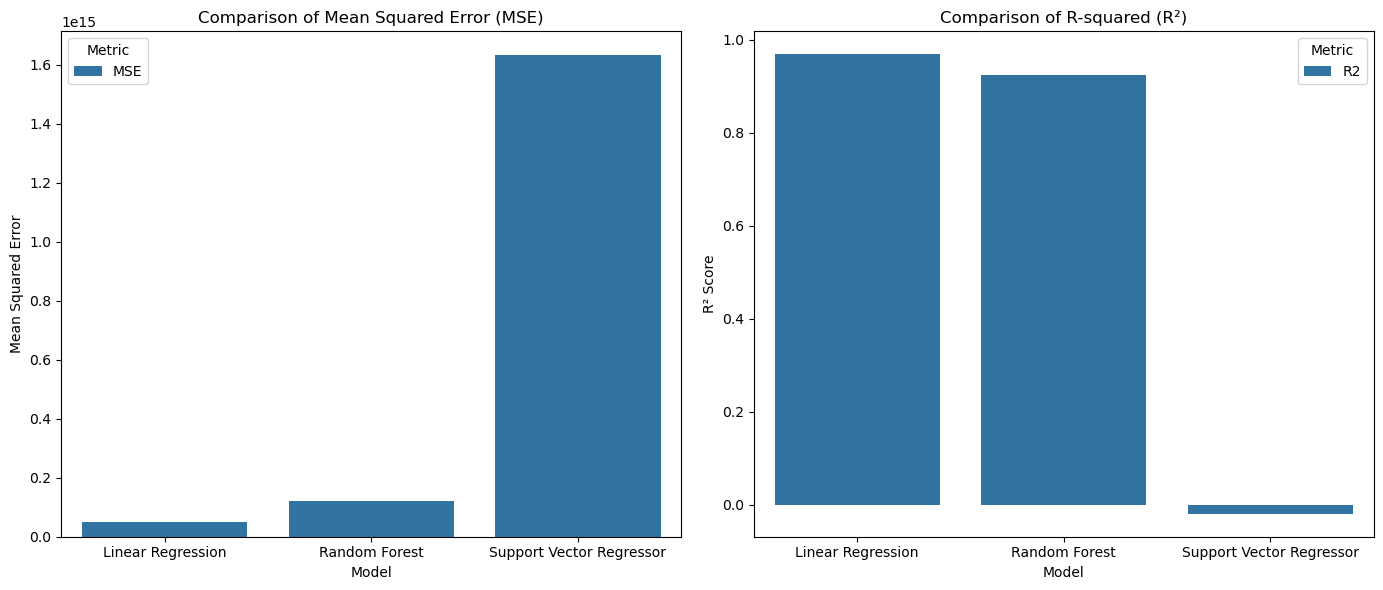

Feature importance for Linear Regression:
                             Feature    Importance
140                 Quartier_Zone 4C  1.565698e+08
63                       Commune_Goh  7.051910e+07
76                  Commune_Kokrenou  5.456726e+07
1                 Nombre_de_chambres  4.139764e+07
38                   Commune_Bracodi  3.750288e+07
..                               ...           ...
139                  Quartier_Zone 4 -2.852199e+07
66            Commune_Grandes Terres -3.347977e+07
134  Quartier_Quartier des Ministres -4.375023e+07
129   Quartier_Quartier Présidentiel -5.093868e+07
117            Quartier_Centre-ville -6.154305e+07

[147 rows x 2 columns]
Graphique récapitulatif SHAP:


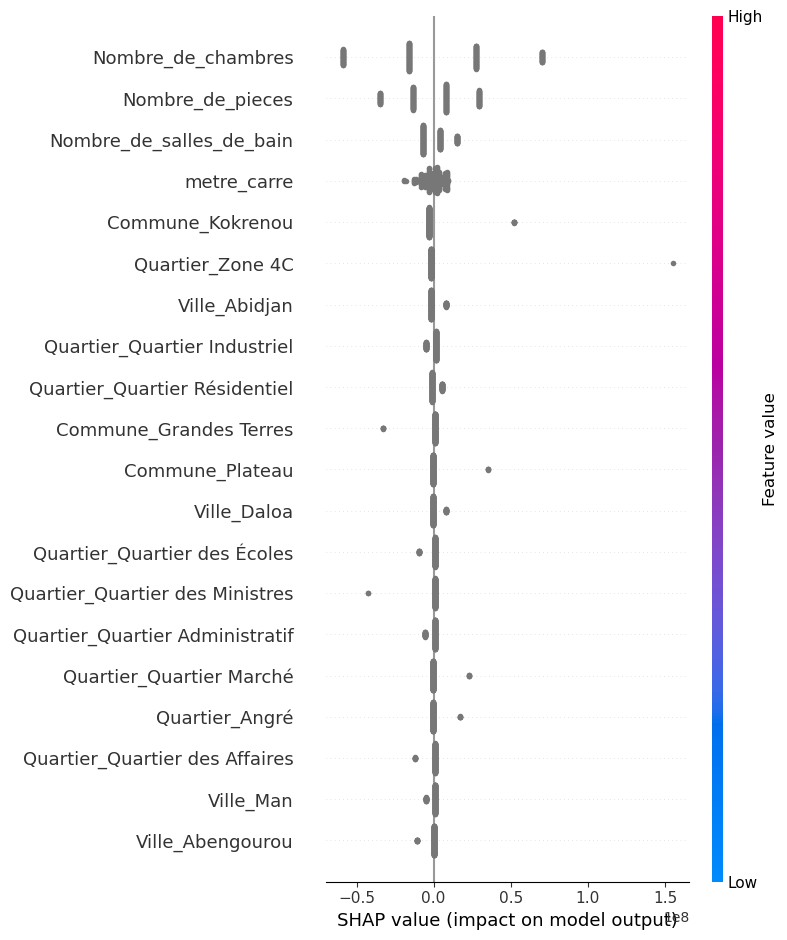

In [1]:
import pyodbc
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import shap

# Paramètres de connexion
server = 'DESKTOP-JK6D8G9\\SQLEXPRESS' 
database = 'MV' 
trusted_Connection='yes'

# Chaîne de connexion
conn_str = (
    f'DRIVER={{SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'Trusted_Connection={trusted_Connection}'
)

# Connexion à la base de données
conn = pyodbc.connect(conn_str)

# Chargement des données de la table Maison
query = "SELECT IdMaison, Ville, Commune, Quartier, Nombre_de_pieces, Nombre_de_chambres, Nombre_de_salles_de_bain, metre_carre, Descriptions, Type_de_maison, Prix_unitaire FROM Maison"
maison_data = pd.read_sql(query, conn)

# Fermeture de la connexion
conn.close()
dfp = maison_data.copy()

# Préparation des données
X = dfp.drop('Prix_unitaire', axis=1)
y = dfp['Prix_unitaire']

# Définir les features
categorical_features = ['Ville', 'Commune', 'Quartier', 'Type_de_maison']
numerical_features = ['Nombre_de_pieces', 'Nombre_de_chambres', 'Nombre_de_salles_de_bain', 'metre_carre']

# Préparation du transformateur pour les colonnes catégorielles et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Définir les modèles
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Entraînement et évaluation des modèles
performance = {}

for nom, model in models.items():
    # Création du pipeline complet
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Division des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
    
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    
    # Évaluation des performances
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = sum(abs(y_test - y_pred) <= 0.1 * y_test) / len(y_test)
    
    performance[nom] = {"MSE": mse, "MAE": mae, "R2": r2, "Accuracy": accuracy}

# Sélection du meilleur modèle
best_model_name = max(performance, key=lambda k: performance[k]['R2'])
best_model = models[best_model_name]

# Affichage des performances
for nom, metrics in performance.items():
    print(f"{nom}: MSE = {metrics['MSE']}, MAE = {metrics['MAE']}, R2 = {metrics['R2']}, Accuracy = {metrics['Accuracy']}")
print(f"Best model is: {best_model_name} with R2 = {performance[best_model_name]['R2']}")

import matplotlib.pyplot as plt
import seaborn as sns
# Préparation des données pour la visualisation
performance_df = pd.DataFrame(performance).T.reset_index().rename(columns={'index': 'Model'})
performance_df = performance_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Tracer le graphique
plt.figure(figsize=(14, 6))

# Graphique des MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Value', hue='Metric', data=performance_df[performance_df['Metric'] == 'MSE'])
plt.title('Comparison of Mean Squared Error (MSE)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')

# Graphique des R²
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Value', hue='Metric', data=performance_df[performance_df['Metric'] == 'R2'])
plt.title('Comparison of R-squared (R²)')
plt.ylabel('R² Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()


# Importance des features pour la régression linéaire
if isinstance(best_model, LinearRegression):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    pipeline.fit(X, y)
    model_coef = pipeline.named_steps['model'].coef_
    feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
    
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model_coef})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print("Feature importance for Linear Regression:")
    print(feature_importance)

# Importance des features pour le Random Forest
if isinstance(best_model, RandomForestRegressor):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    pipeline.fit(X, y)
    model_importances = pipeline.named_steps['model'].feature_importances_
    feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
    
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model_importances})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print("Feature importance for Random Forest:")
    print(feature_importance)

# Utilisation de SHAP pour expliquer le modèle
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
pipeline.fit(X, y)
explainer = shap.Explainer(pipeline.named_steps['model'], pipeline.named_steps['preprocessor'].transform(X))
shap_values = explainer(pipeline.named_steps['preprocessor'].transform(X))

print("Graphique récapitulatif SHAP:")
shap.summary_plot(shap_values, features=pipeline.named_steps['preprocessor'].transform(X), feature_names=numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)))


In [2]:
# Calcul et affichage des prédictions correctes et incorrectes
correct_predictions = []
incorrect_predictions = []

threshold = 0.1  # 10%

for i in range(len(y_test)):
    actual_value = y_test.iloc[i]
    predicted_value = y_pred[i]
    if abs(actual_value - predicted_value) <= threshold * actual_value:
        correct_predictions.append((actual_value, predicted_value))
    else:
        incorrect_predictions.append((actual_value, predicted_value))

print("\nCorrect Predictions:")
for actual, predicted in correct_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")

print("\nIncorrect Predictions:")
for actual, predicted in incorrect_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")


Correct Predictions:
Actual: 105000000.0, Predicted: 94999979.85633823
Actual: 90000000.0, Predicted: 94999965.02896434
Actual: 95000000.0, Predicted: 95000001.6448198

Incorrect Predictions:
Actual: 70000000.0, Predicted: 94999964.8125838
Actual: 65000000.0, Predicted: 94999964.9076695
Actual: 60000000.0, Predicted: 94999966.41973072
Actual: 200000000.0, Predicted: 95000006.48748432
Actual: 70000000.0, Predicted: 94999962.63721296
Actual: 125000000.0, Predicted: 95000005.75737011
Actual: 125000000.0, Predicted: 94999998.25541683


In [4]:
# Fonction pour obtenir les informations de l'utilisateur et prédire le prix
def predict_price():
    # Obtenir les informations de l'utilisateur
    nombre_de_pieces = int(input("Nombre de pièces: "))
    nombre_de_chambres = int(input("Nombre de chambres: "))
    nombre_de_salles_de_bain = int(input("Nombre de salles de bain: "))
    metre_carre = input("Mètres carrés: ")
    ville = input("Ville: ")
    commune = input("Commune: ")
    quartier = input("Quartier: ")
    type_de_maison = input("Type de maison: ")


    
    # Création du dataframe pour la nouvelle maison
    new_house = pd.DataFrame({
        'Nombre_de_pieces': [nombre_de_pieces],
        'Nombre_de_chambres': [nombre_de_chambres],
        'Nombre_de_salles_de_bain': [nombre_de_salles_de_bain],
        'metre_carre': [metre_carre],
        'Ville': [ville],
        'Commune': [commune],
        'Quartier': [quartier],
        'Type_de_maison': [type_de_maison],
    })
    
    # Prédiction avec le pipeline
    predicted_price = pipeline.predict(new_house)
    print(f'Nombre_de_pieces: {nombre_de_pieces}' )
    print(f'Nombre_de_chambres: {nombre_de_chambres}')
    print(f'Nombre_de_salles_de_bain: {nombre_de_salles_de_bain}')
    print(f'metre_carre: {metre_carre}')
    print(f'Ville: {ville}')
    print(f'Commune: {commune}')
    print(f'Quartier: {quartier}')
    print(f'Type_de_maison: {type_de_maison}')
    print(f"Predicted Price: {predicted_price[0]:,.2f} FCFA")

# Appel de la fonction pour prédire le prix d'une nouvelle maison
predict_price()

Nombre_de_pieces: 5
Nombre_de_chambres: 3
Nombre_de_salles_de_bain: 2
metre_carre: 200
Ville: Abidjan
Commune: Cocody
Quartier: Angré
Type_de_maison: Villa
Descriptions: Villa de luxe avec piscine et jardin
Predicted Price: 120,000,542.23 FCFA


C:\Users\HPC\AppData\Local\Temp\ipykernel_14508\2548630356.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  maison_data = pd.read_sql(query, conn)


Linear Regression: MSE = 1.3870751490360627e+17, MAE = 202103981.43424338, R2 = -85.57045710944377, Accuracy = 0.5
Random Forest: MSE = 150776733504818.56, MAE = 8984535.714285713, R2 = 0.9058968740803129, Accuracy = 0.8
Support Vector Regressor: MSE = 1632499106208852.5, MAE = 29499984.951612435, R2 = -0.01887914258627088, Accuracy = 0.3
Best model is: Random Forest with R2 = 0.9058968740803129
Feature importance for Random Forest:
                      Feature    Importance
184                   piscine  1.962661e-01
1          Nombre_de_chambres  1.647569e-01
0            Nombre_de_pieces  1.516824e-01
3                 metre_carre  8.358098e-02
140          Quartier_Zone 4C  3.951710e-02
..                        ...           ...
62            Commune_Gogobro  8.341384e-08
84            Commune_Louhiri  1.703005e-19
96           Commune_Péléforo  0.000000e+00
113       Quartier_Belleville  0.000000e+00
120  Quartier_Quartier Balmer  0.000000e+00

[201 rows x 2 columns]
Graphique r

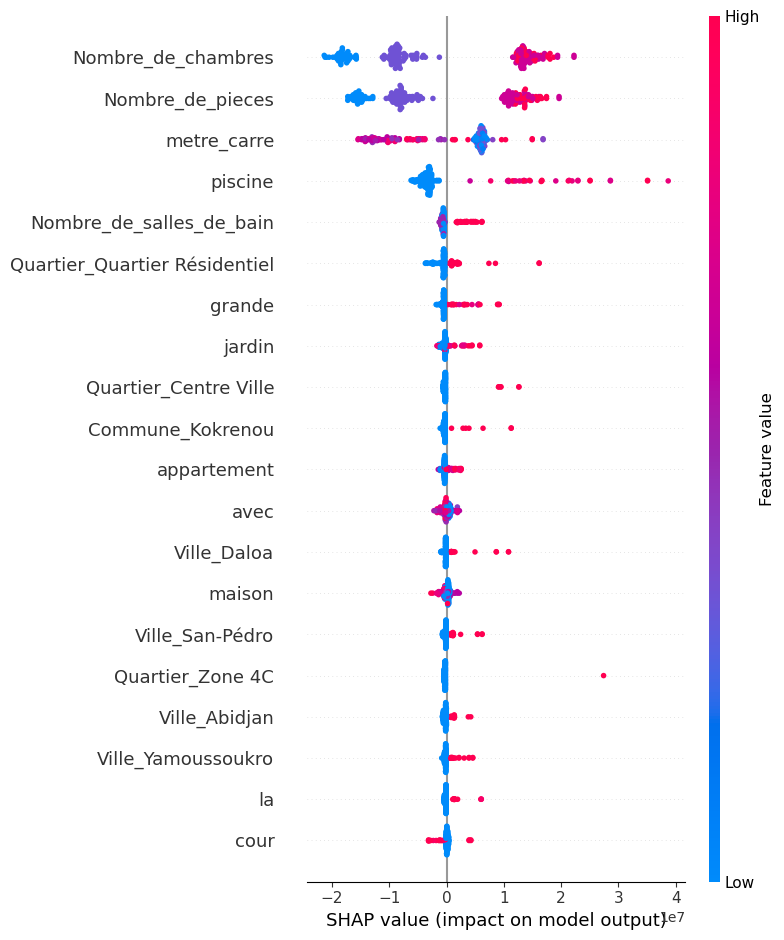

In [8]:
import pyodbc
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import shap

# Paramètres de connexion
server = 'DESKTOP-JK6D8G9\\SQLEXPRESS' 
database = 'MV' 
trusted_Connection='yes'

# Chaîne de connexion
conn_str = (
    f'DRIVER={{SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'Trusted_Connection={trusted_Connection}'
)

# Connexion à la base de données
conn = pyodbc.connect(conn_str)

# Chargement des données de la table Maison
query = "SELECT IdMaison, Ville, Commune, Quartier, Nombre_de_pieces, Nombre_de_chambres, Nombre_de_salles_de_bain, metre_carre, Descriptions, Type_de_maison, Prix_unitaire FROM Maison"
maison_data = pd.read_sql(query, conn)

# Fermeture de la connexion
conn.close()
dfp = maison_data.copy()

# Préparation des données
X = dfp.drop('Prix_unitaire', axis=1)
y = dfp['Prix_unitaire']

# Définir les features
categorical_features = ['Ville', 'Commune', 'Quartier', 'Type_de_maison']
numerical_features = ['Nombre_de_pieces', 'Nombre_de_chambres', 'Nombre_de_salles_de_bain', 'metre_carre']
text_features = 'Descriptions'

# Préparation du transformateur pour les colonnes catégorielles, numériques et textuelles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('text', TfidfVectorizer(max_features=100), text_features)
    ])

# Définir les modèles
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Entraînement et évaluation des modèles
performance = {}

for nom, model in models.items():
    # Création du pipeline complet
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Division des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
    
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    
    # Évaluation des performances
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = sum(abs(y_test - y_pred) <= 0.1 * y_test) / len(y_test)
    
    performance[nom] = {"MSE": mse, "MAE": mae, "R2": r2, "Accuracy": accuracy}

# Sélection du meilleur modèle
best_model_name = max(performance, key=lambda k: performance[k]['R2'])
best_model = models[best_model_name]

# Affichage des performances
for nom, metrics in performance.items():
    print(f"{nom}: MSE = {metrics['MSE']}, MAE = {metrics['MAE']}, R2 = {metrics['R2']}, Accuracy = {metrics['Accuracy']}")
print(f"Best model is: {best_model_name} with R2 = {performance[best_model_name]['R2']}")

# Importance des features pour la régression linéaire
if isinstance(best_model, LinearRegression):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    pipeline.fit(X, y)
    model_coef = pipeline.named_steps['model'].coef_
    feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)) + list(pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out())
    
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model_coef})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print("Feature importance for Linear Regression:")
    print(feature_importance)

# Importance des features pour le Random Forest
if isinstance(best_model, RandomForestRegressor):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    pipeline.fit(X, y)
    model_importances = pipeline.named_steps['model'].feature_importances_
    feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)) + list(pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out())
    
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model_importances})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print("Feature importance for Random Forest:")
    print(feature_importance)

# Utilisation de SHAP pour expliquer le modèle
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
pipeline.fit(X, y)

# Transformer les données en tableaux denses
X_transformed = pipeline.named_steps['preprocessor'].transform(X).toarray()

explainer = shap.Explainer(pipeline.named_steps['model'], X_transformed)
shap_values = explainer(X_transformed)

print("Graphique récapitulatif SHAP:")
shap.summary_plot(shap_values, features=X_transformed, feature_names=numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)) + list(pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out()))


In [8]:
# Calcul et affichage des prédictions correctes et incorrectes
correct_predictions = []
incorrect_predictions = []

threshold = 0.1  # 10%

for i in range(len(y_test)):
    actual_value = y_test.iloc[i]
    predicted_value = y_pred[i]
    if abs(actual_value - predicted_value) <= threshold * actual_value:
        correct_predictions.append((actual_value, predicted_value))
    else:
        incorrect_predictions.append((actual_value, predicted_value))

print("\nCorrect Predictions:")
for actual, predicted in correct_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")

print("\nIncorrect Predictions:")
for actual, predicted in incorrect_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")


Correct Predictions:
Actual: 105000000.0, Predicted: 94999982.44906592
Actual: 90000000.0, Predicted: 94999967.82798855
Actual: 95000000.0, Predicted: 95000001.44627132

Incorrect Predictions:
Actual: 70000000.0, Predicted: 94999968.7555384
Actual: 65000000.0, Predicted: 94999968.5487542
Actual: 60000000.0, Predicted: 94999970.5834683
Actual: 200000000.0, Predicted: 95000007.17629594
Actual: 70000000.0, Predicted: 94999967.05061339
Actual: 125000000.0, Predicted: 95000006.70552385
Actual: 125000000.0, Predicted: 94999998.36562411


In [4]:
import pyodbc
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
import shap

# Paramètres de connexion
server = 'DESKTOP-JK6D8G9\\SQLEXPRESS' 
database = 'MV' 
trusted_Connection='yes'

# Chaîne de connexion
conn_str = (
    f'DRIVER={{SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'Trusted_Connection={trusted_Connection}'
)

# Connexion à la base de données
conn = pyodbc.connect(conn_str)

# Chargement des données de la table Maison
query = "SELECT IdMaison, Ville, Commune, Quartier, Nombre_de_pieces, Nombre_de_chambres, Nombre_de_salles_de_bain, metre_carre, Descriptions, Type_de_maison, Prix_unitaire FROM Maison"
maison_data = pd.read_sql(query, conn)

# Fermeture de la connexion
conn.close()
dfp = maison_data.copy()

# Préparation des données
X = dfp.drop('Prix_unitaire', axis=1)
y = dfp['Prix_unitaire']

# Définir les features
categorical_features = ['Ville', 'Commune', 'Quartier', 'Type_de_maison']
numerical_features = ['Nombre_de_pieces', 'Nombre_de_chambres', 'Nombre_de_salles_de_bain', 'metre_carre']
text_features = 'Descriptions'

# Préparation du transformateur pour les colonnes catégorielles, numériques et textuelles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('text', TfidfVectorizer(max_features=100), text_features)
    ])

# Définir les modèles et hyperparamètres pour la recherche en grille
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Définir les modèles
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1),
    "Support Vector Regressor": SVR()
}

# Entraînement et évaluation des modèles
performance = {}

for nom, model in models.items():
    # Création du pipeline complet
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Division des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    
    # Évaluation des performances
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = sum(abs(y_test - y_pred) <= 0.1 * y_test) / len(y_test)
    
    performance[nom] = {"MSE": mse, "MAE": mae, "R2": r2, "Accuracy": accuracy}

# Sélection du meilleur modèle
best_model_name = max(performance, key=lambda k: performance[k]['R2'])
best_model = models[best_model_name]

# Affichage des performances
for nom, metrics in performance.items():
    print(f"{nom}: MSE = {metrics['MSE']}, MAE = {metrics['MAE']}, R2 = {metrics['R2']}, Accuracy = {metrics['Accuracy']}")
print(f"Best model is: {best_model_name} with R2 = {performance[best_model_name]['R2']}")

# Importance des features pour la régression linéaire
if isinstance(best_model, LinearRegression):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    pipeline.fit(X, y)
    model_coef = pipeline.named_steps['model'].coef_
    feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)) + list(pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out())
    
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model_coef})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print("Feature importance for Linear Regression:")
    print(feature_importance)

# Importance des features pour le Random Forest
if isinstance(best_model, RandomForestRegressor):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model.best_estimator_ if hasattr(best_model, 'best_estimator_') else best_model)])
    pipeline.fit(X, y)
    model_importances = pipeline.named_steps['model'].feature_importances_
    feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)) + list(pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out())
    
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model_importances})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print("Feature importance for Random Forest:")
    print(feature_importance)

# Utilisation de SHAP pour expliquer le modèle
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model.best_estimator_ if hasattr(best_model, 'best_estimator_') else best_model)])
pipeline.fit(X, y)

# Transformer les données en tableaux denses
X_transformed = pipeline.named_steps['preprocessor'].transform(X).toarray()

explainer = shap.Explainer(pipeline.named_steps['model'], X_transformed)
shap_values = explainer(X_transformed)

print("Graphique récapitulatif SHAP:")
shap.summary_plot(shap_values, features=X_transformed, feature_names=numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)) + list(pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out()))


C:\Users\HPC\AppData\Local\Temp\ipykernel_30332\456326534.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  maison_data = pd.read_sql(query, conn)


ValueError: Invalid parameter 'model' for estimator RandomForestRegressor(random_state=42). Valid parameters are: ['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].